In [1]:
%pip install -q python-dotenv langchain-openai

Note: you may need to restart the kernel to use updated packages.


In [2]:
from dotenv import load_dotenv

load_dotenv()

True

### 랭체인

In [4]:
from langchain_openai import ChatOpenAI

query = '안녕하세요. 당신은 누구십니까?'

llm = ChatOpenAI(model='gpt-4o-mini') # 테스트의 경우에는 작은 모델을 사용합니다
ai_answer = llm.invoke(query)
ai_answer.content

'안녕하세요! 저는 AI 언어 모델입니다. 여러분의 질문에 답하고 정보를 제공하는 데 도움을 드리기 위해 여기 있습니다. 무엇을 도와드릴까요?'

### 랭그래프

In [5]:
%pip install -q langgraph

Note: you may need to restart the kernel to use updated packages.


#### state: 상태 선언하기

In [7]:
from typing import Annotated
from typing_extensions import TypedDict

from langgraph.graph.message import add_messages # 랭그래프의 메서드드
from langchain_core.messages import AnyMessage # 랭체인 코어의 메서드
# AnyMessage 클래스는 SystemMessage, HumanMessage, AIMessage를 가지고있다.

class AgentState(TypedDict):
    messages: list[Annotated[AnyMessage, add_messages]]

#### 그래프 빌더 만들기

In [8]:
from langgraph.graph import StateGraph

graph_builder = StateGraph(AgentState)

#### 노드 만들기

In [10]:
# 예시로 일단 generate라는 노드를 만들어보자

def generate(state: AgentState) -> AgentState:
    """
    `generate` 노드는 사용자의 질문을 받아서 응답을 생성하는 노드입니다.
    """
    messages = state['messages']
    ai_message = llm.invoke(messages)
    return {'messages': [ai_message]}

In [11]:
graph_builder.add_node('generate', generate)

#### start, end 만들기

In [ ]:
from langgraph.graph import START, END


# node를 생성하고 edge로 연결
graph_builder.add_edge(START, 'generate')
graph_builder.add_edge('generate', END)

#### 그래프 컴파일하기

In [13]:
graph = graph_builder.compile()

#### 의도한대로 그래프가 생성됐는지 mermaid로 확인하기 

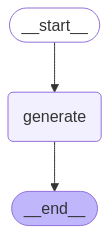

In [14]:
from IPython.display import display, Image

display(Image(graph.get_graph().draw_mermaid_png()))

#### invoke 호출하기

In [15]:
from langchain_core.messages import HumanMessage

initial_state = {'messages': [HumanMessage(query)]}
graph.invoke(initial_state)

{'messages': [AIMessage(content='안녕하세요! 저는 AI 언어 모델입니다. 다양한 질문에 답변하고, 정보나 도움을 제공하는 역할을 합니다. 무엇을 도와드릴까요?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 36, 'prompt_tokens': 16, 'total_tokens': 52, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_b376dfbbd5', 'id': 'chatcmpl-BFusx9bWfbJUUrby9eylmSFnkLCW3', 'finish_reason': 'stop', 'logprobs': None}, id='run-31ec66d7-d260-4352-9bba-4754eb9f7904-0', usage_metadata={'input_tokens': 16, 'output_tokens': 36, 'total_tokens': 52, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})]}